<a href="https://colab.research.google.com/github/nike-2001/AI-Hands-on/blob/main/Copy_of_Working_with_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

### Loading Dataset into a NumPy array

In [ ]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/mnist_sample.csv

--2021-01-25 12:14:51--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/mnist_sample.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.62.71
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.62.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1825481 (1.7M) [text/csv]
Saving to: ‘mnist_sample.csv’

mnist_sample.csv    100%[===================>]   1.74M  2.35MB/s    in 0.7s    

2021-01-25 12:14:52 (2.35 MB/s) - ‘mnist_sample.csv’ saved [1825481/1825481]



In [ ]:
!tail mnist_sample.csv

9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,106,164,183,254,183,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,166,254,254,254,254,254,254,211,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,223,251,185,69,36,36,75,204,254,161,6,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,38,224,251,122,0,0,0,0,0,20,248,254,36,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,163,254,152,0,0,0,0,0,0,0,163,254,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164,219,13,0,0,0,0,0,12,99,223,239,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,211,8,0,0,0,0,0,71,254,254,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,254,127,0,0,0,0,0,123,254,254,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,190,243,154,19,19,19,19,204,254,254,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,169,254,2

In [ ]:
file_name = "mnist_sample.csv"

In [ ]:
data = np.genfromtxt(file_name, delimiter=',', dtype=np.int)

**Shape of the `data` array**

In [ ]:
data.shape

(1000, 785)

### `Data` as Inputs and Outputs

* Inputs are represented as a Design Matrix $X$.
* Output vector is represented as $Y$.  

Outputs are also called as target labels. In case of MNIST dataset, the labels are {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

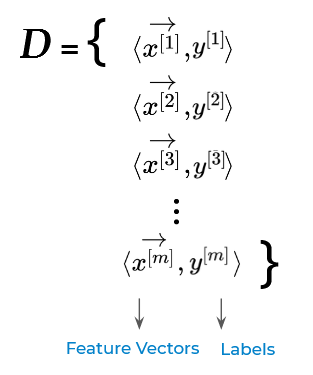

In [ ]:
Y = data[:, 0].reshape(-1, 1)
X = data[:, 1:]

print("Shape of X: \n", X.shape, "\n")
print("Shape of Y: \n", Y.shape)

Shape of X: 
 (1000, 784) 

Shape of Y: 
 (1000, 1)


Slicing the input array to get a few images

In [ ]:
first_five_images = X[0:5]
first_five_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Visualizing the image from an input vector

In [ ]:
import matplotlib.pyplot as plt

def visualise(image_1D):
    image_2D = np.reshape(image_1D,(28,28))
    plt.imshow(image_2D, cmap=plt.get_cmap('gray'))
    plt.show()

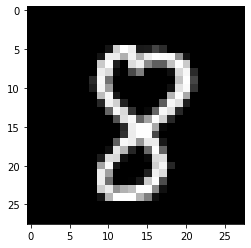

In [ ]:
visualise(X[895, :])

Checking the corresponding label in the output vector

In [ ]:
print(Y[895, 0])

8


### Checking whether the dataset is balanced or imbalanced

In [ ]:
np.unique(Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))

In [ ]:
np.bincount(Y.flatten())

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

### Splitting the Data

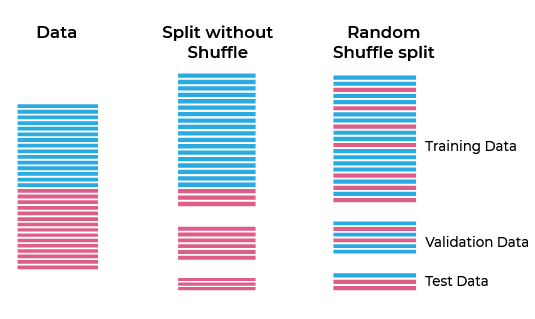

Random Shuffle Split using **`np.random.permutation`**

In [ ]:
np.random.permutation(10)

array([3, 4, 7, 1, 0, 2, 5, 8, 9, 6])

In [ ]:
num_instances = data.shape[0]
permuted_indices = np.random.permutation(num_instances)
permuted_indices

array([877, 370, 624, 956, 761, 645, 896, 594,  83, 858, 963, 338, 983,
       330, 652, 319, 389, 885, 708,  99, 296, 500, 138, 823, 723, 493,
        84, 642, 855, 551,  15, 183, 802, 701, 568, 952, 651, 457, 316,
       223, 810, 719, 757, 588, 794, 374, 584, 231,  39, 559, 831, 884,
       431, 306,  76, 222,  78, 383, 464, 971, 104, 752, 333, 315, 367,
       958, 212, 534, 143, 416, 168, 217, 318, 101, 901, 234, 678, 346,
       688,  72, 449, 793, 485, 422, 267, 248, 702, 665, 974,   1, 391,
       428, 229, 721, 972, 755, 869,  94, 305, 598, 582, 966, 672, 387,
        45, 208, 864, 569, 811,  42, 441, 883, 639, 714, 728,   6, 182,
       807, 455, 886, 359, 789, 961, 476, 841, 998, 420, 774, 364, 438,
       997,   0, 881, 600, 705, 753, 575,  57, 203, 650, 751, 340,  58,
       170,   7, 829, 524, 727, 201, 547, 479, 353, 176, 888, 830, 407,
       362, 501, 904, 536, 246, 815, 450, 762, 620, 694, 398, 216, 205,
       323, 759, 940, 444, 689,  23, 273,  71, 570,  81, 152, 80

Using **`random.seed`**

In [ ]:
np.random.seed(11235811)

data_count = data.shape[0]
permuted_indices = np.random.permutation(data_count)
permuted_indices

array([184, 376, 840, 170, 717, 824, 202,  78, 712, 986, 997, 325, 241,
       949, 839, 119, 955, 387, 473, 262, 619, 291, 896, 924,  73, 901,
       610, 876, 530, 900,  47, 344, 585, 495, 334, 256,  12, 453, 225,
       182, 226, 546, 358, 789, 995, 568, 848, 612,  93, 594, 339, 431,
       976, 723, 116, 172, 542, 682, 235,  17, 740, 217, 722, 735, 307,
       993, 364, 347, 588, 960, 656, 320, 667, 128, 434, 964, 700, 166,
       846, 904, 269, 961,  48, 779, 940,  92, 490, 775, 818, 108, 368,
       935, 732, 482, 141, 604, 979, 616, 444,  18, 962, 481, 750, 326,
       437, 409, 943, 257, 776, 913, 593, 345, 966, 783, 845, 895, 281,
       231, 865, 382, 369, 296, 265, 977, 341, 317,  76,  30, 606, 288,
       185, 795, 559, 180, 447, 704, 837, 111, 756, 147, 110, 800, 421,
       891, 791, 250, 695, 245, 420, 591, 501,  35, 365, 449, 144,  71,
       978, 253, 871, 248, 826, 644, 459, 689, 862, 787, 647, 316, 462,
       597, 523, 470, 600, 851, 983, 613, 965, 860, 522,  74, 37

**Shuffling both inputs and outputs using the same `permuted_indices`** to maintain the correctness of labels

In [ ]:
shuffled_X = X[permuted_indices]
shuffled_Y = Y[permuted_indices]

In [ ]:
train_ratio = 0.9

num_instances = data.shape[0]
train_count = np.int(train_ratio * num_instances)

In [ ]:
train_X = shuffled_X[:train_count, :] 
train_Y = shuffled_Y[:train_count, :]

print("train_X.shape:", train_X.shape)
print("train_Y.shape:", train_Y.shape)

train_X.shape: (900, 784)
train_Y.shape: (900, 1)


In [ ]:
validation_X = shuffled_X[train_count:, :] 
validation_Y = shuffled_Y[train_count:, :]

print("validation_X.shape:", validation_X.shape)
print("validation_Y.shape:", validation_Y.shape)

validation_X.shape: (100, 784)
validation_Y.shape: (100, 1)


### Distance between two images

**Minkowski distance function**

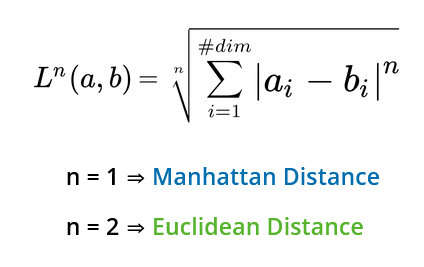

In [ ]:
def minkowski_distance_between_two_images(image_1, image_2, n):
  abs_diff_btwn_arrays = np.abs(image_1 - image_2)
  sum = np.sum(np.power(abs_diff_btwn_arrays, n))
  minkowski_distance = np.power(sum, 1/n)
  return minkowski_distance

**Distance between two images of same digit**

In [ ]:
raveled_train_Y = train_Y.ravel()
np.where(raveled_train_Y == 5)

(array([ 28,  32,  41,  45,  49,  56,  68, 110, 132, 149, 150, 169, 170,
        178, 186, 198, 226, 234, 235, 239, 270, 277, 285, 303, 312, 316,
        317, 344, 345, 346, 358, 371, 387, 399, 410, 414, 417, 433, 435,
        456, 464, 485, 486, 487, 495, 506, 508, 509, 519, 530, 535, 549,
        562, 570, 582, 586, 596, 604, 612, 613, 617, 657, 659, 663, 667,
        670, 685, 689, 695, 704, 711, 741, 743, 755, 761, 775, 778, 791,
        809, 821, 824, 831, 866, 879, 880, 885, 888]),)

labels: 5 5
Euclidean Distance: 2011.9510431419549 



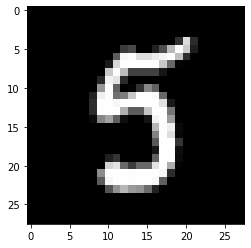

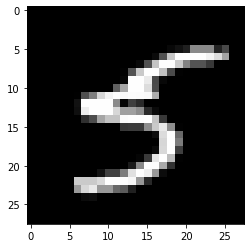

In [ ]:
print("labels:", train_Y[509, 0], train_Y[791, 0])
print("Euclidean Distance:", minkowski_distance_between_two_images(train_X[509], train_X[791], 2), "\n")

visualise(train_X[509])
visualise(train_X[791])

**Distance between two images of different digits**

In [ ]:
np.where(raveled_train_Y == 5)

(array([ 28,  32,  41,  45,  49,  56,  68, 110, 132, 149, 150, 169, 170,
        178, 186, 198, 226, 234, 235, 239, 270, 277, 285, 303, 312, 316,
        317, 344, 345, 346, 358, 371, 387, 399, 410, 414, 417, 433, 435,
        456, 464, 485, 486, 487, 495, 506, 508, 509, 519, 530, 535, 549,
        562, 570, 582, 586, 596, 604, 612, 613, 617, 657, 659, 663, 667,
        670, 685, 689, 695, 704, 711, 741, 743, 755, 761, 775, 778, 791,
        809, 821, 824, 831, 866, 879, 880, 885, 888]),)

In [ ]:
np.where(raveled_train_Y == 1)

(array([  0,   3,  15,  39,  54,  55,  73,  77,  89,  94, 130, 133, 137,
        139, 140, 154, 187, 188, 195, 196, 204, 231, 237, 247, 252, 276,
        279, 282, 297, 299, 301, 307, 311, 313, 326, 328, 331, 339, 354,
        361, 370, 374, 431, 454, 472, 473, 479, 498, 517, 524, 529, 565,
        567, 569, 577, 585, 609, 620, 633, 635, 646, 649, 650, 655, 669,
        690, 701, 705, 707, 716, 721, 729, 749, 771, 774, 786, 796, 798,
        800, 814, 822, 823, 827, 837, 843, 852, 857, 874, 891, 894, 898]),)

labels: 5 1
euclidean distance: 2434.0345108481924 



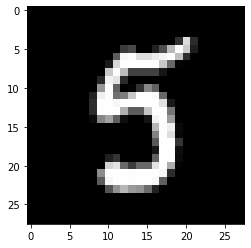

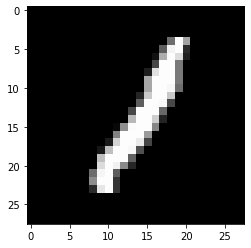

In [ ]:
print("labels:", train_Y[509, 0], train_Y[852, 0])
print("euclidean distance:", minkowski_distance_between_two_images(train_X[509], train_X[852], 2), "\n")

visualise(train_X[509])
visualise(train_X[852])